# Assignment 1: Analysis of Missing Data using `missingno` Package  
**Group 29**

### Authors:
- **Dhruv Panchal** (ID: 202411042)
- **Priya Patel** (ID: 202411048)
- **Natansh Shah** (ID: 202201445)

## Installing missingno package

In [135]:
# pip install missingno # type: ignore

## Importing libraries

In [136]:
import pandas as pd # type: ignore
import missingno as msno # type: ignore
import matplotlib.pyplot as plt # type: ignore

## Reading the dataset

In [137]:
df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20240918.csv")
df.head()

/var/folders/wm/c85h8n_d4tb5t_r3wklmts540000gn/T/ipykernel_60868/4203193749.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20240918.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [139]:
# basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119648 entries, 0 to 2119647
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [140]:
# Getting dimensions of the dataset
print("Number of rows" , df.shape[0])
print("Number of columns" , df.shape[1])
print("Total cells" , (df.shape[0]*df.shape[1]))

Number of rows 2119648
Number of columns 29
Total cells 61469792


## Understanding Missing Values 

In [141]:
# Getting Number of missing values for each coloumns
print("Getting Number of missing values for each coloumns.")
print(df.isnull().sum(),end="\n\n")

print("Below is shown the set of columns which have missing values.")
columns_with_nulls = df.columns[df.isnull().sum() > 0]
print(columns_with_nulls)

Getting Number of missing values for each coloumns.
CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           659248
ZIP CODE                          659508
LATITUDE                          247035
LONGITUDE                         247035
LOCATION                          247035
ON STREET NAME                    453325
CROSS STREET NAME                 806959
OFF STREET NAME                  1758696
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7097
CONTRIBUTING FACTOR VEHICLE 2     331693
CONTRIBUTING FACTOR VEHICLE 3    1967360
CONTRIBUTING FACTOR VEHICLE 4    2085110
CONTRIBUTING FACTOR VEHICLE 5    2110258
COLLI

## Percentage of missing values for columns

In [142]:
def getPerMiss(df):
    percentage_missing = (df.isnull().sum() / df.shape[0]) * 100

    # Filter columns with more than 0% missing data
    columns_with_missing = percentage_missing[percentage_missing > 0]
    return columns_with_missing

columns_with_missing = getPerMiss(df)
print(columns_with_missing)

BOROUGH                          31.101768
ZIP CODE                         31.114034
LATITUDE                         11.654529
LONGITUDE                        11.654529
LOCATION                         11.654529
ON STREET NAME                   21.386806
CROSS STREET NAME                38.070425
OFF STREET NAME                  82.971135
NUMBER OF PERSONS INJURED         0.000849
NUMBER OF PERSONS KILLED          0.001463
CONTRIBUTING FACTOR VEHICLE 1     0.334820
CONTRIBUTING FACTOR VEHICLE 2    15.648494
CONTRIBUTING FACTOR VEHICLE 3    92.815411
CONTRIBUTING FACTOR VEHICLE 4    98.370579
CONTRIBUTING FACTOR VEHICLE 5    99.557002
VEHICLE TYPE CODE 1               0.677707
VEHICLE TYPE CODE 2              19.391946
VEHICLE TYPE CODE 3              93.083757
VEHICLE TYPE CODE 4              98.428230
VEHICLE TYPE CODE 5              99.570542
dtype: float64


## Visualizing Missing Data using Different Functionalities of `missingno`

The `missingno` library provides several powerful tools to visualize missing data in your dataset, enabling you to better understand and handle incomplete data. Below are the key visualization techniques offered by `missingno`:

## 1. Bar Plot (`missingno.bar()`)

The **bar plot** provides a quick summary of the total amount of missing data in each feature by displaying vertical bars, with their height corresponding to the number of missing values.

### What It Shows:
1. **Percentage of Missing Data**:  
   The length of each bar shows the percentage (or count) of missing values for each feature.

2. **Feature Comparison**:  
   It allows for easy comparison of missing data across features to identify which columns are most affected.

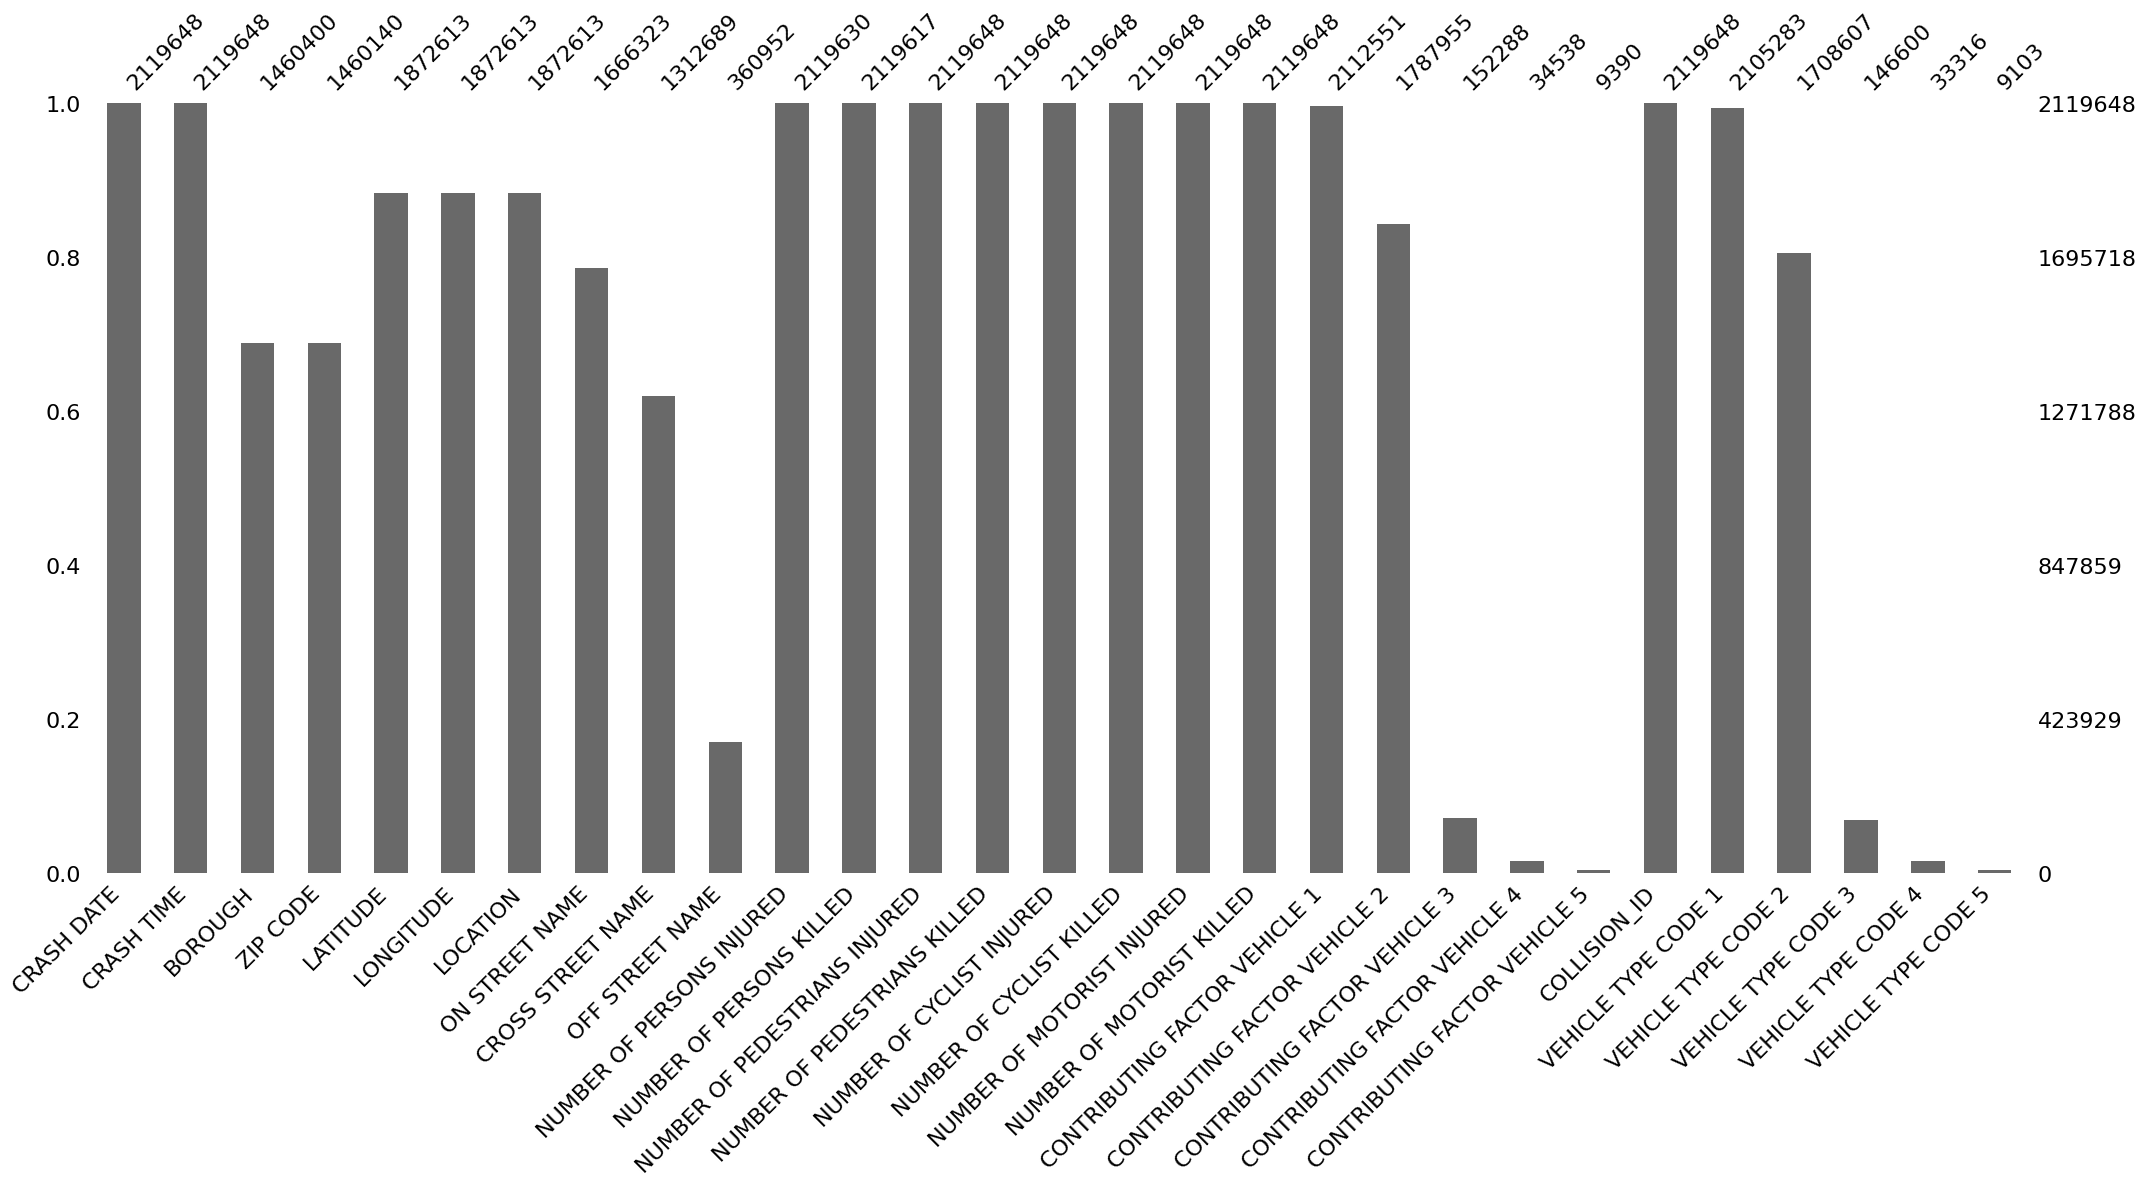

In [143]:
# Bar Graph Reprsenting number of Non - Zero Field Values in each Field
plt.figure(figsize=(10, 5))
msno.bar(df)
plt.show()

Features like "OFF STREET NAME," "VEHICLE TYPE CODE 5," and others show significant missingness, with over 80% of their data missing which is evident from the above graph.

## 2. Matrix Plot (`missingno.matrix()`)

The **matrix plot** displays missing data for each feature in the dataset as a matrix where rows represent observations and columns represent features. Missing data is represented by white spaces, while available data is shown in shaded areas.

### What It Shows:
1. **Vertical Bars (Columns)**:  
   Each vertical bar represents a feature (column) in your dataset. The height of these bars corresponds to the number of rows (or entries) in the dataset. Every row in the dataset is represented as a thin horizontal line running through each vertical column.

2. **White Spaces**:  
   White spaces within the vertical bars represent missing data. Whenever a data point is missing for a specific row in a feature, that position in the bar is left blank. So, the more white space you see in a particular column, the more missing data that column contains.

3. **Shaded Areas (Non-Missing Data)**:  
   The shaded portions of the bars indicate the presence of data (non-missing values). If a column has no white spaces, it means it contains no missing values for any row in the dataset.

4. **The First Column on the Left**:  
   This column (sometimes shaded darker) is an index or reference column, which represents each individual row of data in the dataset. It helps you trace how missing data behaves across multiple features.

5. **Bottom Line**:  
   The plot may include a heatmap-style line at the bottom representing the relative percentage of missing data across all columns. Darker areas along this line indicate features (columns) with fewer missing values, while lighter areas correspond to columns with a greater percentage of missing data.

<Figure size 1000x500 with 0 Axes>

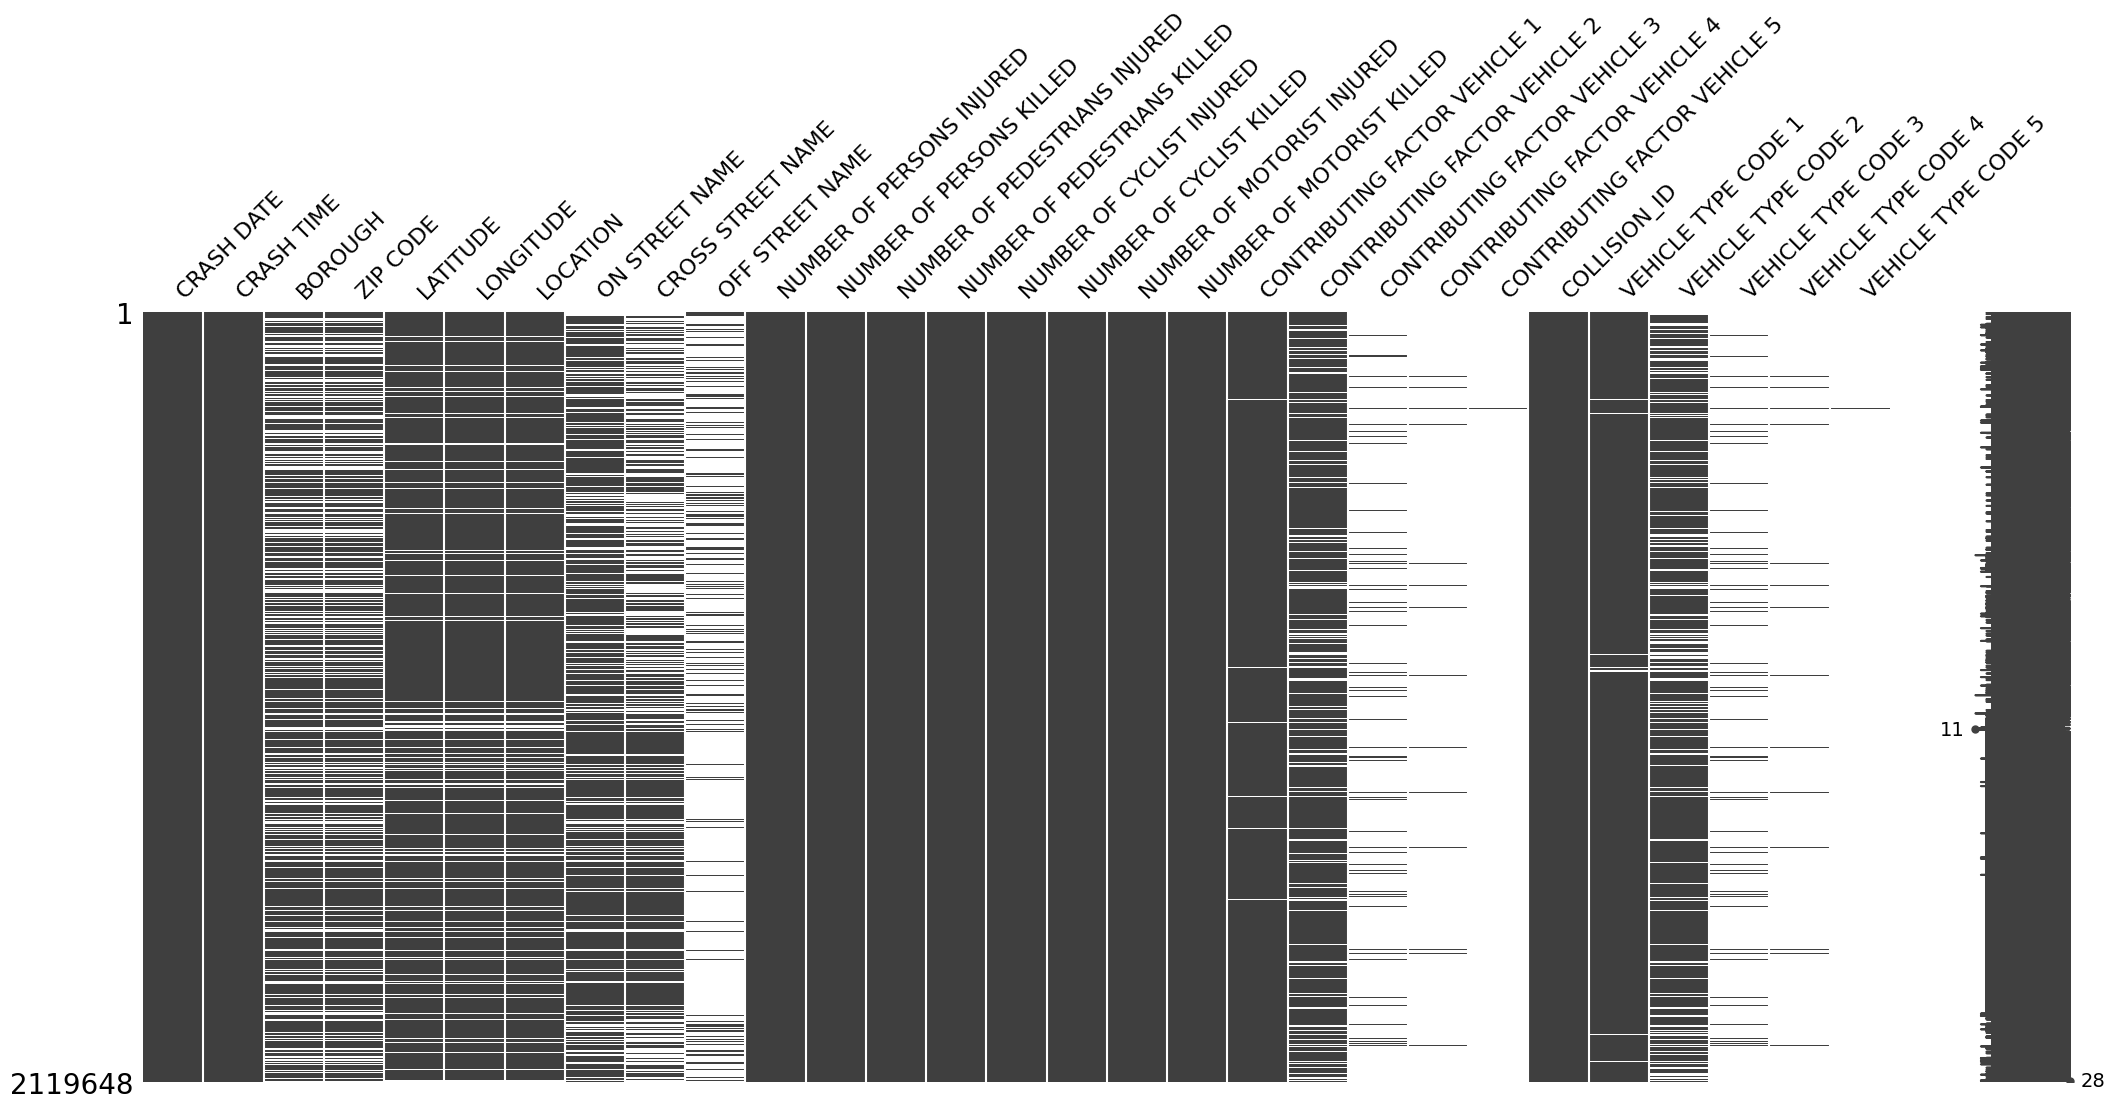

In [144]:
plt.figure(figsize=(10, 5))
msno.matrix(df)
plt.show()

Columns with larger white gaps, like "OFF STREET NAME" and "VEHICLE TYPE CODE 5," show where missing values are concentrated. This plot allows for an understanding of how missing data is distributed across rows and helps identify patterns of missingness across features.

## 3. Heatmap (`missingno.heatmap()`)

### Description:
The **heatmap** shows correlations in missing data between features. The plot uses a color gradient to represent the strength of the correlation between missing data in pairs of features. Darker colors indicate stronger correlations.

### What It Shows:
1. **Correlation of Missing Data**:  
   The heatmap reveals how missing data in one feature relates to missing data in other features. If two features tend to have missing values in the same rows, the correlation between their missingness will be high (darker color).

2. **Dependency Relationships**:  
   Features with a high correlation in missing data may suggest that they share some dependency or systematic relationship in how the data was collected.

<Figure size 1000x500 with 0 Axes>

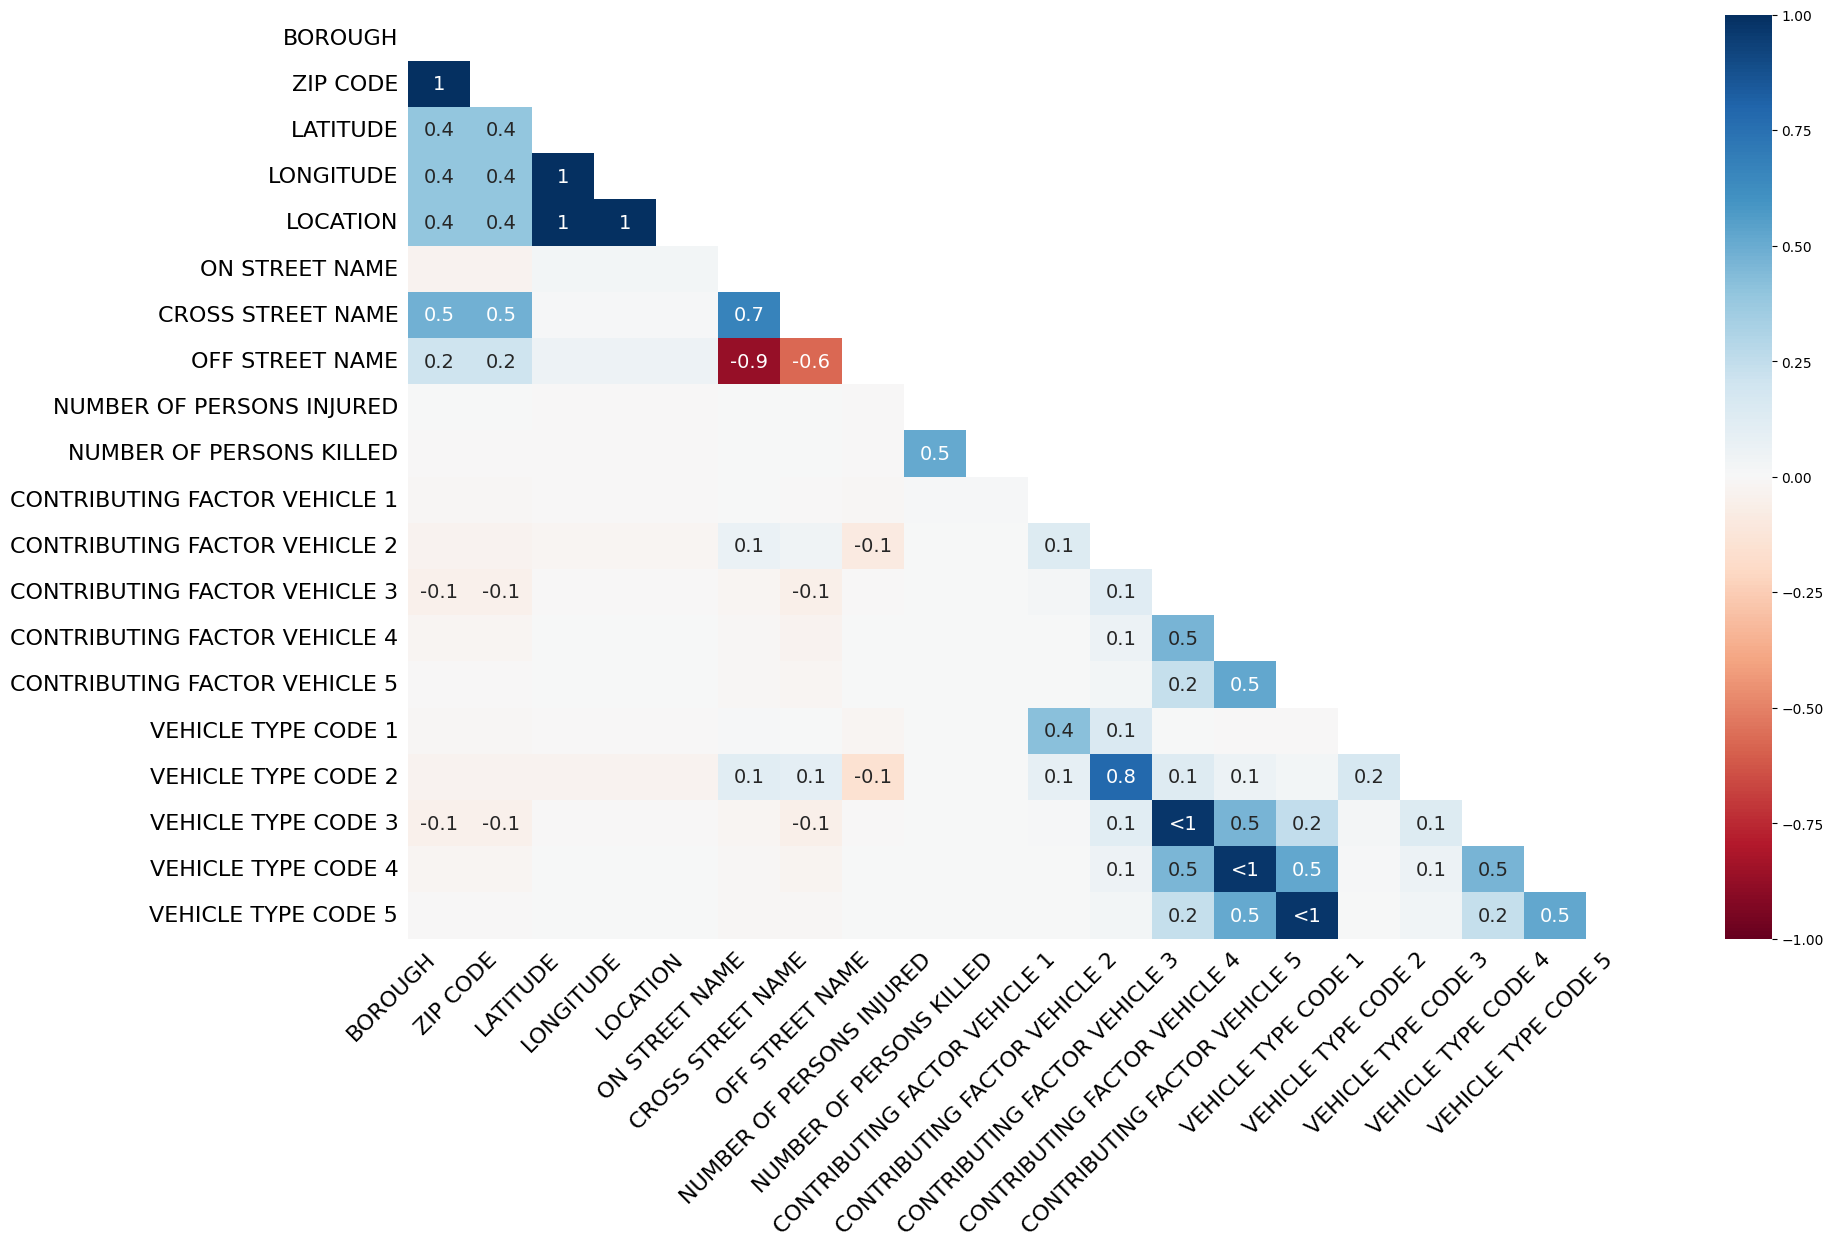

In [145]:
plt.figure(figsize=(10, 5))
msno.heatmap(df)
plt.show()

The heatmap shows correlations in missing data between different features. Darker areas indicate stronger correlations, meaning if one feature has missing values, another related feature is likely to have missing data as well. The heatmap helps to detect relationships in missingness patterns, suggesting potential causes or dependencies between features that might guide how to handle missing data.

## 4. Dendrogram (`missingno.dendrogram()`)

### Description:
The **dendrogram plot** is a hierarchical clustering of features based on the similarity of their missing data patterns. It groups features with similar missing value patterns and displays them as a tree structure, where the height of the branches indicates how similar the missing data patterns are.

### What It Shows:
1. **Feature Clustering**:  
   The dendrogram clusters features that have similar patterns of missing values. Features that tend to have missing values in the same rows will be grouped together.

2. **Hierarchical Structure**:  
   The length of the branches in the dendrogram indicates how closely related the missing data patterns of different features are. Longer branches mean less similarity in missing data patterns, while shorter branches indicate a stronger similarity.

<Figure size 1000x500 with 0 Axes>

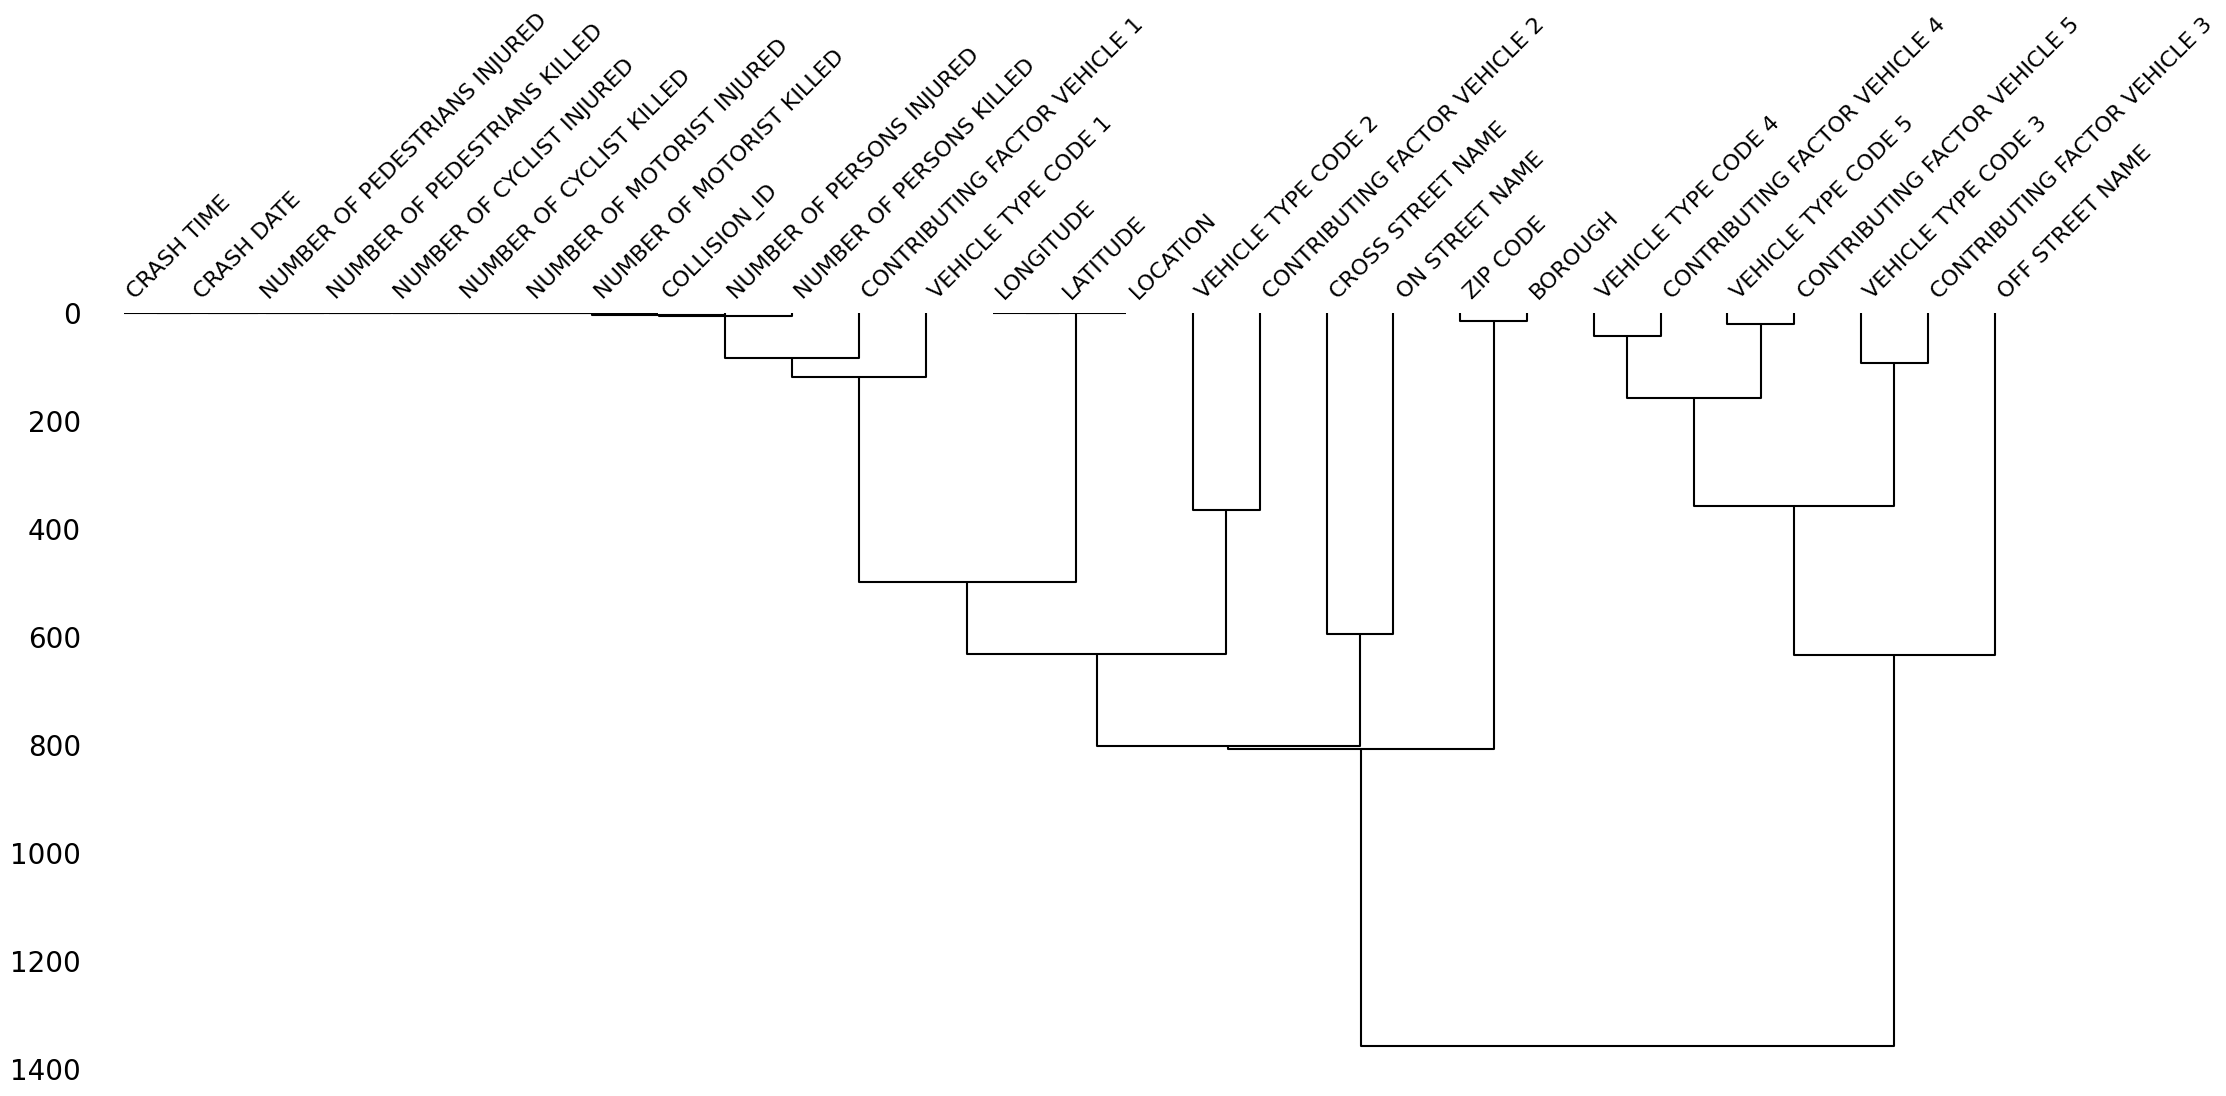

In [146]:
plt.figure(figsize=(10, 5))
msno.dendrogram(df)
plt.show()

The heatmap shows correlations in missing data between different features. Darker areas indicate stronger correlations, meaning if one feature has missing values, another related feature is likely to have missing data as well. The heatmap helps to detect relationships in missingness patterns, suggesting potential causes or dependencies between features that might guide how to handle missing data.